In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 아래의 데이터에서 행복도지수 "score'를 예측하는 모델을 머신러닝 모델과 딥러닝 neural net 모델로 각각 생성하고,
# 모델을 저장하시오
# 'year', 'rank', 'country' 칼럼은 제외하시오..

In [3]:
df = pd.read_csv('C:\\Users\\M\\Downloads\\Bigdata\\world_happiness_index.csv')
df.head()

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,2015,1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,2015,2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,2015,3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,2015,4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176


In [4]:
df.drop(['year','rank','country'],axis=1,inplace=True)

In [5]:
#머신러닝

In [6]:
df

,score,economy,family,health,freedom,generosity,trust,residual
0,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...
930,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [7]:
df.trust.fillna(df.trust.mean(),inplace=True)

C:\Users\M\AppData\Local\Temp\ipykernel_2908\1673521190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.trust.fillna(df.trust.mean(),inplace=True)


In [8]:
x=df.drop('score',axis=1)
y=df.score

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred), mean_squared_error(y_test,pred))

0.9999993067024789 8.43600450687051e-07


In [11]:
#딥러닝

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [13]:
x.shape

(935, 7)

In [14]:
model=Sequential()
model.add(Dense(60,input_dim=7,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
x_train = x_train.values.astype('float32')
x_test = x_test.values.astype('float32')
y_train = y_train.values.astype('float32')
y_test = y_test.values.astype('float32')

In [16]:
model.compile(optimizer='adam',loss='mse')

In [17]:
history=model.fit(x_train,y_train,epochs=100,batch_size=50,validation_data=(x_test,y_test))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 32.4513 - val_loss: 30.1872
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.4382 - val_loss: 30.0095
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.3707 - val_loss: 29.8500
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.7625 - val_loss: 29.6903
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.7639 - val_loss: 29.5322
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.2295 - val_loss: 29.3742
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.7354 - val_loss: 29.2170
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.9010 - val_loss: 29.0600
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.5218 - val_loss: 28.9041
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.1362 - val_loss: 28.7488
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.4109 - val_loss: 28.5931
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 

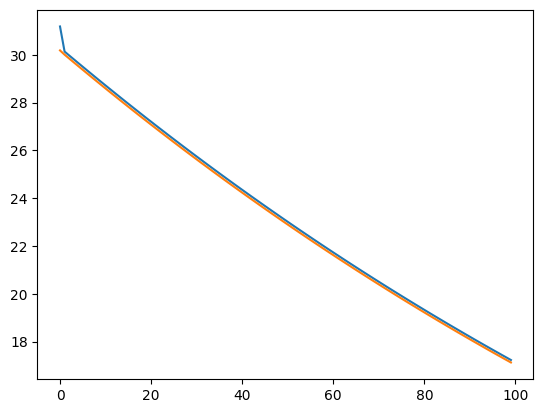

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [19]:
# 아래의 코드에서 Kyphosis를 분류하는 머신러닝 모델을 생성하고 딥러닝 neural network모델 중 binary classification과
# multi classification 두 방식으로 neural net 모델을 생성하고, 모델을 저장하시오

In [20]:
df = pd.read_csv('C:\\Users\\M\\Downloads\\Bigdata\\kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [21]:
y=df.Kyphosis
x=df.drop('Kyphosis',axis=1)

In [22]:
#머신러닝

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.82      1.00      0.90        14
     present       0.00      0.00      0.00         3

    accuracy                           0.82        17
   macro avg       0.41      0.50      0.45        17
weighted avg       0.68      0.82      0.74        17



c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [25]:
#딥러닝 바이너리

In [26]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y_train_enc=label.fit_transform(y_train)
y_test_enc=label.fit_transform(y_test)

In [27]:
# x_train = x_train.values.astype('float32')
# x_test = x_test.values.astype('float32')

In [28]:
x.shape

(81, 3)

In [29]:
model = Sequential()
model.add(Dense(30, input_dim = 3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.fit(x_train,y_train_enc,epochs=100,validation_data=(x_test,y_test_enc))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.2500 - loss: 3.6976 - val_accuracy: 0.1765 - val_loss: 3.5727
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2292 - loss: 2.8614 - val_accuracy: 0.3529 - val_loss: 2.0443
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3438 - loss: 1.5616 - val_accuracy: 0.3529 - val_loss: 0.9265
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5521 - loss: 0.7650 - val_accuracy: 0.5294 - val_loss: 0.6539
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7604 - loss: 0.5925 - val_accuracy: 0.8235 - val_loss: 0.5219
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7604 - loss: 0.5449 - val_accuracy: 0.8235 - val_loss: 0.5952
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7604 - loss: 0.6408 - val_accuracy: 0.8235 - val_loss: 0.6679
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7812 - loss: 0.7061 - val_accuracy: 0.8235 - val_loss

In [32]:
#딥러닝

In [33]:
from tensorflow.keras.utils import to_categorical
y_train_ohe=to_categorical(y_train_enc)
y_test_ohe=to_categorical(y_test_enc)

In [34]:
model = Sequential()
model.add(Dense(30, input_dim = 3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2,activation='softmax'))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
x_train = x_train.values.astype('float32')
x_test = x_test.values.astype('float32')

In [50]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_dir = './model/'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.keras'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [51]:
history=model.fit(x_train,y_train_ohe,epochs=100,validation_data=(x_test,y_test_ohe),callbacks=[early_stopping_callback, checkpoint])

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8854 - loss: 0.2802 - val_accuracy: 0.7059 - val_loss: 0.5230
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8750 - loss: 0.2771 - val_accuracy: 0.6471 - val_loss: 0.5215
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8542 - loss: 0.3046 - val_accuracy: 0.7059 - val_loss: 0.5226
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8750 - loss: 0.2679 - val_accuracy: 0.7059 - val_loss: 0.5431
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8958 - loss: 0.2551 - val_accuracy: 0.7059 - val_loss: 0.5491
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8750 - loss: 0.2721 - val_accuracy: 0.7059 - val_loss: 0.5344
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8958 - loss: 0.2895 - val_accuracy: 0.6471 - val_loss: 0.5198
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8438 - loss: 0.3147 - val_accuracy: 0.6471 - val_loss:

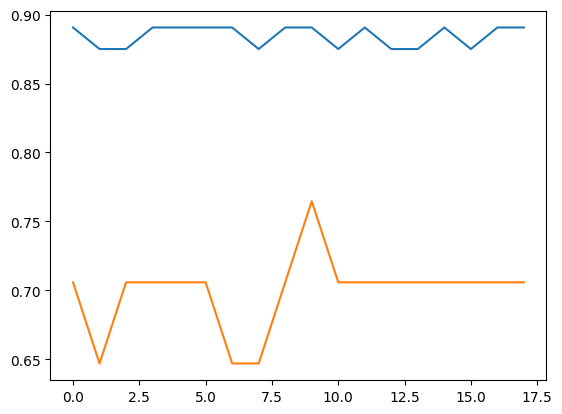

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])